## Assignment:

Deadline : 09.03.2016 Wed  18:59

* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of vehicles in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.

$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


* Fit an AR model to each data sequence 
$$
y_i = w_1 y_{i-1} + \epsilon_i
$$

Which model would you prefer? Polynomial or AR?

For each model, plot the data and your model fit $f = A w^*$

### Bonus: 
Use cross validation for finding the best polynomial order and describe you approach.



    Your Name : Emre Bolat

In [1]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

df_arac = pd.read_csv(u'data/arac.csv',sep=';')
df_arac

,Year,All,Car,Minibus,Bus,SmallTruck,Truck,Motorcycle,SpecialVehicles,Machinery,Tractor
0,1966,231977,91469,10913,12041,31462,47931,32099,3610,2452,NaN
1,1967,284194,112367,16008,13332,39927,56889,39647,3641,2383,NaN
2,1968,318768,125375,18967,13948,43441,62616,47062,4033,3326,NaN
3,1969,354398,137345,20540,15529,48655,69478,52959,4568,5324,NaN
4,1970,369808,137771,20916,15980,52152,70730,60994,5070,6195,NaN
5,1971,403880,153676,22380,17140,57011,73433,68417,5349,6474,NaN
6,1972,460087,187272,25559,18504,62796,78920,74402,5747,6887,NaN
7,1973,543318,240360,30055,20011,71043,86780,80860,6420,7789,NaN
8,1974,647947,313160,34122,21404,81025,95309,86028,7338,9561,NaN
9,1975,785920,403546,40623,23763,98579,108381,91421,8450,11157,NaN


In [2]:
BaseYear = 1966
degree = 4

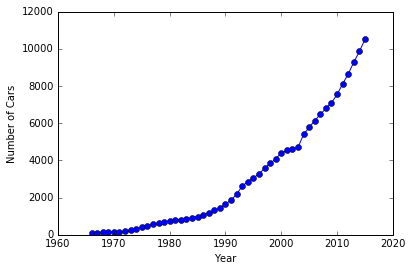

In [3]:
### Number of "Cars"
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Car[0:]).T/1000
plt.plot(x+BaseYear, y, "o-")
plt.xlabel("Year")
plt.ylabel("Number of Cars")
plt.show()

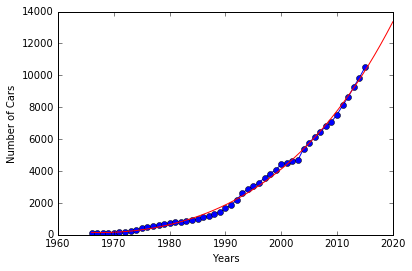

In [4]:
### Vandermonde Matrix for Cars
N = len(x)
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')

plt.xlabel('Years')
plt.ylabel('Number of Cars')

plt.show()

In [5]:
print("Cars in 2016:")
print(f[45])
print()
print("Cars in 2017:")
print(f[46])
print()
print("Cars in 2018:")
print(f[47])
print()
print("Cars in 2019:")
print(f[48])
print()
print("Cars in 2020:")
print(f[49])

Cars in 2016:
[[ 10621.37726264]]

Cars in 2017:
[[ 11263.12009962]]

Cars in 2018:
[[ 11933.61860813]]

Cars in 2019:
[[ 12633.8263736]]

Cars in 2020:
[[ 13364.71808491]]


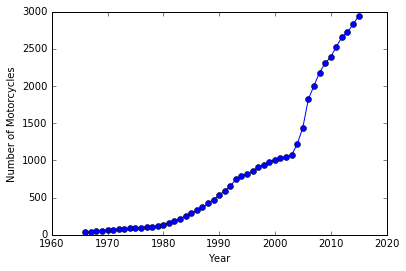

In [6]:
### Number of "Motorcycles"
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Motorcycle[0:]).T/1000
plt.plot(x+BaseYear, y, "o-")
plt.xlabel("Year")
plt.ylabel("Number of Motorcycles")
plt.show()

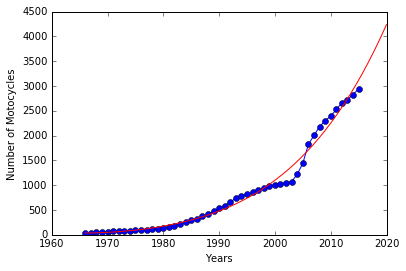

In [7]:
### Vandermonde Matrix for Motocycles

N = len(x)
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')

plt.xlabel('Years')
plt.ylabel('Number of Motocycles')

plt.show()

In [8]:
print("Motocycles in 2016:")
print(f[45])
print()
print("Motocycles in 2017:")
print(f[46])
print()
print("Motocycles in 2018:")
print(f[47])
print()
print("Motocycles in 2019:")
print(f[48])
print()
print("Motocycles in 2020:")
print(f[49])

Motocycles in 2016:
[[ 3236.13084145]]

Motocycles in 2017:
[[ 3466.44086965]]

Motocycles in 2018:
[[ 3709.85953893]]

Motocycles in 2019:
[[ 3966.93205805]]

Motocycles in 2020:
[[ 4238.21616067]]
